# A02-Sympy (corrección)
### Nombre: Israel Santiago Gómez
### Fecha: 27/08/2023

## Ejercicios de optimización escalar

**Para la siguientes funciones encuentre los puntos críticos, grafique y diga si éste se trata de un máximo o mínimo, local o global.**

## Ejercicio 1

$f(x)=1260+117x-9x^2$

In [1]:

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

sp.var("x")

def f(x):
    return 1260 + 117*x - 9*x**2
df = sp.diff(f(x))
pc = sp.solve(df, x)
print("Puntos criticos: ", pc)

Puntos criticos:  [13/2]


In [2]:
#Segunda derivada
dff = sp.diff(df, x)

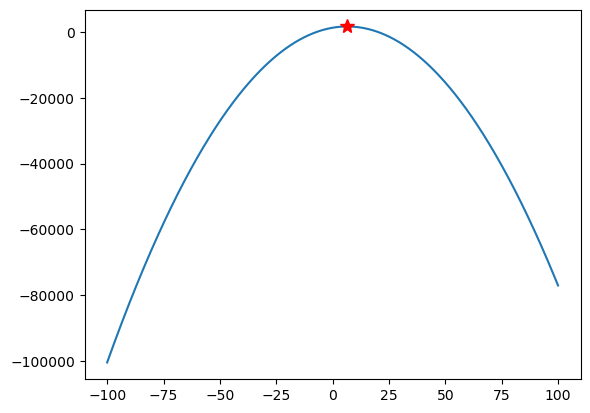

In [3]:
#Grafica
xn = np.linspace (-100, 100, 1000)
plt.figure()
plt.plot(xn, f(xn))
for c in pc : 
    plt.plot(c, f(c), "*r", ms = 10)
    


En la grafica se puede observar que se trata de un maximo global

## Ejercicio 2

$f(x)=5+x+\frac{4}{x}$, para $x>0$

In [4]:
def f(x):
    return 5 + x + 4/x

df = sp.diff(f(x))
pc = sp.solve(df, x)

print("Puntos criticos: ", pc)

Puntos criticos:  [-2, 2]


In [5]:
#Segunda derivada
dff = sp.diff(df, x)
dff

8/x**3

/var/folders/_h/h_tdvphj52gb968602z1qp500000gn/T/ipykernel_6528/1289394649.py:2: RuntimeWarning: divide by zero encountered in divide
  return 5 + x + 4/x


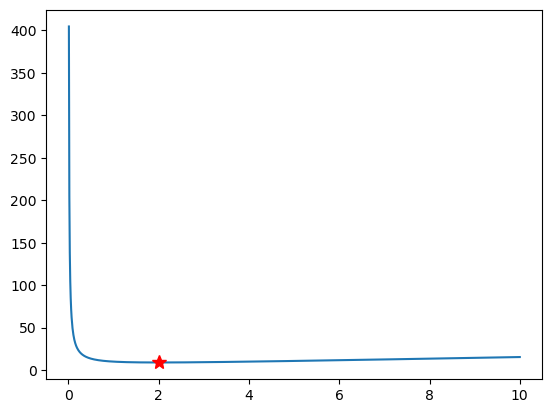

In [8]:
#Grafica
xn = np.linspace (0, 10, 1000)
plt.figure()
plt.plot(xn, f(xn))

plt.plot(c, f(c), "*r", ms = 10)
    

In [7]:
for c in pc:
    crit_2da_derivada = dff.subs(x, c)
    if crit_2da_derivada > 0:
        res = "mínimo local"
    elif crit_2da_derivada < 0:
        res = "máximo local"
    else:
        res = "no se puede determinar"
    
    print(f"El punto crítico {c} es un {res}")

El punto crítico -2 es un máximo local
El punto crítico 2 es un mínimo local


## Ejercicio 3

$f(x)=6-2x+\sqrt{18-2x^2}$, para $-3\leq x\leq 3$

In [18]:

def f(x):
    return 6 - 2*x + (18-2*x**2)**0.5

df = sp.diff(f(x))
pc = sp.solve(df, x)

print("Puntos criticos: ", pc)

Puntos criticos:  [-2.44948974278318]


In [19]:

#Segunda derivada
dff = sp.diff(df, x)
dff

-4.0*x**2/(18 - 2*x**2)**1.5 - 2.0/(18 - 2*x**2)**0.5

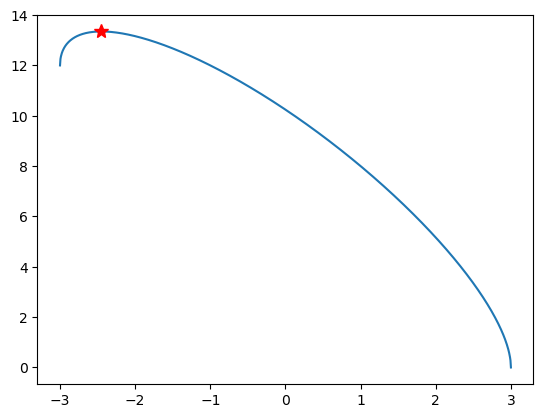

In [21]:

#Grafica
xn = np.linspace (-3, 3, 1000)
plt.figure()
plt.plot(xn, f(xn))
for c in pc : 
    plt.plot(c, f(c), "*r", ms = 10)
    

Se puede observar que el punto critico es un maximo global

## Ejercicio 4

$f(x)=\frac{1}{4}x^4+\frac{1}{3}x^3-x^2$ en el intervalo $[-3,1.7]$

In [43]:
def f(x):
    return (1/4)*x**4 + (1/3)*x**3 - x**2

df = sp.diff(f(x))
pc = sp.solve(df, x)

print("Puntos criticos: ", pc)

Puntos criticos:  [-2.00000000000000, 0.0, 1.00000000000000]


In [44]:
#Segunda derivada
dff = sp.diff(df, x)
dff

3.0*x**2 + 2.0*x - 2

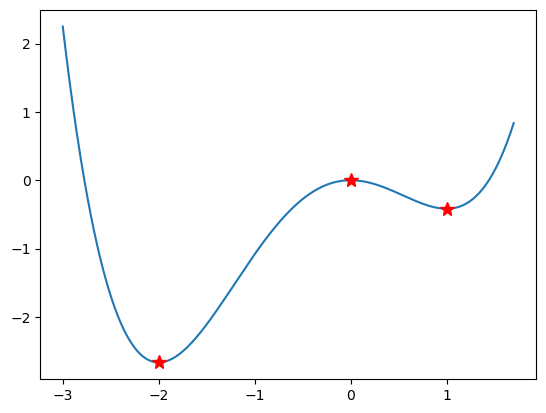

In [45]:
#Grafica
xn = np.linspace (-3, 1.7, 1000)
plt.figure()
plt.plot(xn, f(xn))
for c in pc : 
    plt.plot(c, f(c), "*r", ms = 10)

Se puede observar que :

- el punto -2 es un minimo global
- el punto 0 es un maximo local
- el punto 1 es un minimo local


---
## Resuelva los siguientes problemas usando la librería `SymPy`. Use celdas en `Markdown` para explicar su procedimiento.

## Ejercicio 1
El perímetro de un triángulo isósceles es de $10 cm$. ¿Cuánto deben medir sus lados para que el volumen del cuerpo generado por la rotación del triángulo en torno a su base sea el mayor posible? (Volumen de un cono $= \frac{1}{3}\pi r^2 h$, donde $r$ es el radio de la base y $h$ la altura del cono).

**Paso 1: Establecer la relación entre los lados**

Dado que P = 10 y P = 2a + b, podemos expresar b en terminos de a:

$b = 10 - 2a$ , lo cual es el diametro del cono, por lo tanto podemos expresar el radio como:

$r = 5-a$

**Paso 2: Expresar el volumen del cono en funcion de a**

Sustituimos en la formula del volumen:

$V = \frac{1}{3}\pi (5 - a)^2 a$

**Paso 3: Enconctrar el valor maximo de V usando sympy**

Para esto derivamos V con respecto a "a"

In [54]:
import sympy as sp

sp.var ("a")
V = (1/3) * sp.pi * (5 - a)**2 * a
dV_da = sp.diff(V, a)

puntos_criticos = sp.solve(dV_da, a)

In [55]:
volumen_maximo = max([V.subs(a, c) for c in puntos_criticos])

# Sustituimos el valor de a que da el volumen máximo
op_a = sp.solve(V - volumen_maximo, a)
op_b = 10 - 2 * op_a[0]

print("Los lados optimos son: ", op_a)

Los lados optimos son:  [1.66666666666667, 6.66666666666667]


## Ejercicio 2

Disponemos de una barra de aluminio de 6 metros para construir una portería de fútbol. Si queremos que el área de la portería sea máxima, ¿cuánto deben medir los postes y el travesaño?

Una portería consiste en dos postes y un travesaño, lo que implica que el perímetro total se expresaría como $2x+y=6$

**Paso 1: Expresar el área en función de $x$**

El área $A$ de la portería sigue siendo $A = x(6-2x)$

**Paso 2: Derivar respecto a x para encontrar el valor maximo**

Derivamos A respecto a x para encontrar los valores maximos, luego sustituimos para encontrar el valor de y


In [58]:
import sympy as sp

x = sp.symbols('x')
Area = x * (6 - 2 * x)

puntos_criticos = sp.solve(sp.diff(Area, x), x)

area_maxima = max([Area.subs(x, c) for c in puntos_criticos])

x_optimo = sp.solve(Area - area_maxima, x)
y_optimo = 6 - 2 * x_optimo[0]

print("Postes: ", x_optimo[0], "m")
print("Travesaño:",  y_optimo, "m")

Postes:  3/2 m
Travesaño: 3 m
